In [313]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as sps
import matplotlib.pyplot as plt
import statistics
import math

## Уровень доверия

In [314]:
def get_normal_samples(n):
    k = 50
    norm_rv = sps.norm(loc=10, scale=2)
    samples = []
    for i in range(k):
        samples.append(norm_rv.rvs(size=n))
    
    return np.array(samples)

In [315]:
def get_means(samples):
    means = []
    for i in range(len(samples)):
        means.append(samples[i].mean())
    
    return np.array(means)

In [316]:
def get_borders(means, p):
    norm_rv = sps.norm(0, 1)
    fp = norm_rv.ppf(p)
    left, right = [], []
    for i in range(len(means)):
        left.append(means[i] - fp*(2/np.sqrt(10)))
        right.append(means[i] + fp*(2/np.sqrt(10)))

    return np.array(left), np.array(right)

In [317]:
def print_quantile(func, ps):
    quantiles = list(map(lambda x: np.round(x, 3), func.ppf(ps)))
    df = pd.DataFrame()
    df['Pд'] = ps
    df['Значение квантили fp'] = quantiles
    return df

In [318]:
print_quantile(sps.norm(0, 1), [0.9, 0.99, 0.999])

,Pд,Значение квантили fp
0,0.900,1.282
1,0.990,2.326
2,0.999,3.090


In [319]:
samples = get_normal_samples(10)
means = get_means(samples)
df = pd.DataFrame(samples)
df['mean'] = means

left, right = get_borders(means, 0.9)
df['left'] = left
df['right'] = right
df.head()

,0,1,2,3,4,5,6,7,8,9,mean,left,right
0,9.906660,8.362648,11.912747,10.638943,11.039851,10.179700,9.328103,8.263483,8.616144,10.200825,9.844910,9.034386,10.655435
1,10.251786,7.871113,5.847877,7.013269,9.152113,11.357511,9.992211,12.288724,8.633465,9.631200,9.203927,8.393403,10.014451
2,8.071932,11.346101,12.919161,8.656506,9.958627,7.445405,10.940905,8.202841,11.380545,9.872530,9.879455,9.068931,10.689980
3,8.107516,10.611168,10.242824,11.837869,9.007227,7.935591,8.704698,11.109790,10.914322,10.144473,9.861548,9.051023,10.672072
4,11.021241,12.242883,9.790539,9.902809,12.900543,14.749891,10.081728,11.804402,9.981590,13.494243,11.596987,10.786462,12.407511


In [320]:
def draw_borders(left, right):
    x = np.linspace(1, 50, 50)
    plt.axis([0, 51, 5, 15])
    plt.plot(x, left, label='a1')
    plt.plot(x, right, label='a2')
    plt.scatter(x, left, s=15)
    plt.scatter(x, right, s=15)
    plt.xlabel('Номер испытания')
    plt.ylabel('Значение')
    plt.grid(True)
    plt.legend()

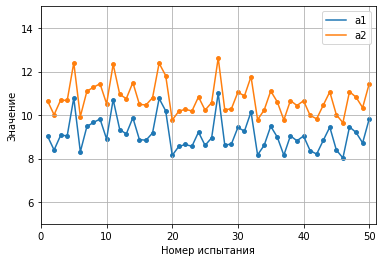

In [321]:
draw_borders(left, right)

In [322]:
left, right = get_borders(means, 0.99)
df['left'] = left
df['right'] = right
df.head()

,0,1,2,3,4,5,6,7,8,9,mean,left,right
0,9.906660,8.362648,11.912747,10.638943,11.039851,10.179700,9.328103,8.263483,8.616144,10.200825,9.844910,8.373599,11.316222
1,10.251786,7.871113,5.847877,7.013269,9.152113,11.357511,9.992211,12.288724,8.633465,9.631200,9.203927,7.732615,10.675239
2,8.071932,11.346101,12.919161,8.656506,9.958627,7.445405,10.940905,8.202841,11.380545,9.872530,9.879455,8.408144,11.350767
3,8.107516,10.611168,10.242824,11.837869,9.007227,7.935591,8.704698,11.109790,10.914322,10.144473,9.861548,8.390236,11.332859
4,11.021241,12.242883,9.790539,9.902809,12.900543,14.749891,10.081728,11.804402,9.981590,13.494243,11.596987,10.125675,13.068298


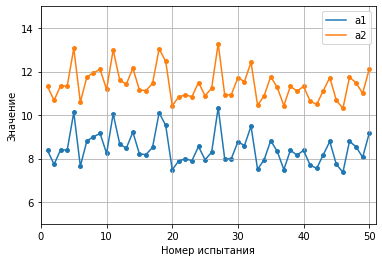

In [323]:
draw_borders(left, right)

In [324]:
left, right = get_borders(means, 0.999)
df['left'] = left
df['right'] = right
df.head()

,0,1,2,3,4,5,6,7,8,9,mean,left,right
0,9.906660,8.362648,11.912747,10.638943,11.039851,10.179700,9.328103,8.263483,8.616144,10.200825,9.844910,7.890476,11.799345
1,10.251786,7.871113,5.847877,7.013269,9.152113,11.357511,9.992211,12.288724,8.633465,9.631200,9.203927,7.249492,11.158362
2,8.071932,11.346101,12.919161,8.656506,9.958627,7.445405,10.940905,8.202841,11.380545,9.872530,9.879455,7.925021,11.833890
3,8.107516,10.611168,10.242824,11.837869,9.007227,7.935591,8.704698,11.109790,10.914322,10.144473,9.861548,7.907113,11.815982
4,11.021241,12.242883,9.790539,9.902809,12.900543,14.749891,10.081728,11.804402,9.981590,13.494243,11.596987,9.642552,13.551421


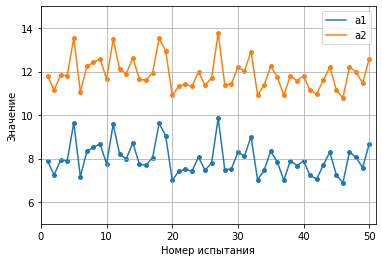

In [325]:
draw_borders(left, right)

### Для случая с неизвестной дисперсией

In [326]:
print_quantile(sps.t(df=9), [0.9, 0.99, 0.999])

,Pд,Значение квантили fp
0,0.900,1.383
1,0.990,2.821
2,0.999,4.297


In [327]:
def get_borders_unknown_disp(means, std, p):
    stud_rv = sps.t(df=9)
    tp = stud_rv.ppf(p)
    left, right = [], []
    for i in range(len(means)):
        left.append(means[i] - tp*(std[i]/np.sqrt(10)))
        right.append(means[i] + tp*(std[i]/np.sqrt(10)))

    return np.array(left), np.array(right)

In [328]:
samples = get_normal_samples(10)
means = get_means(samples)
std = list(map(lambda x : statistics.stdev(x), samples))
df = pd.DataFrame(samples)
df['mean'] = means

left, right = get_borders_unknown_disp(means, std, 0.9)
df['left'] = left
df['right'] = right
df.head()

,0,1,2,3,4,5,6,7,8,9,mean,left,right
0,9.674298,7.943116,10.765683,12.844775,13.052271,6.340493,11.612525,11.135116,10.805572,11.086472,10.526032,9.619410,11.432654
1,7.974458,5.923681,8.615866,7.643056,10.908963,8.547460,11.134922,12.814467,13.769614,7.161464,9.449395,8.324199,10.574591
2,8.761968,10.308908,9.061179,10.786504,10.183174,7.391572,10.312763,9.843629,11.161171,12.831690,10.064256,9.421923,10.706589
3,8.350061,8.880067,10.385030,11.412375,10.600895,10.464783,9.444290,13.973397,9.919938,7.702356,10.113319,9.342584,10.884054
4,8.840146,9.134887,7.708546,9.861255,9.454439,8.670451,9.406376,8.500798,9.214573,11.149334,9.194080,8.795585,9.592576


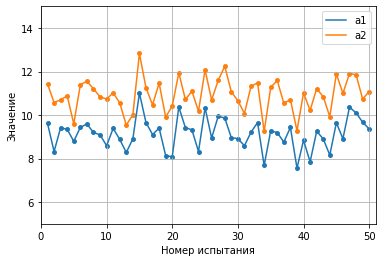

In [329]:
draw_borders(left, right)

In [330]:
left, right = get_borders_unknown_disp(means, std, 0.99)
df['left'] = left
df['right'] = right
df.head()

,0,1,2,3,4,5,6,7,8,9,mean,left,right
0,9.674298,7.943116,10.765683,12.844775,13.052271,6.340493,11.612525,11.135116,10.805572,11.086472,10.526032,8.676484,12.375580
1,7.974458,5.923681,8.615866,7.643056,10.908963,8.547460,11.134922,12.814467,13.769614,7.161464,9.449395,7.153947,11.744842
2,8.761968,10.308908,9.061179,10.786504,10.183174,7.391572,10.312763,9.843629,11.161171,12.831690,10.064256,8.753870,11.374642
3,8.350061,8.880067,10.385030,11.412375,10.600895,10.464783,9.444290,13.973397,9.919938,7.702356,10.113319,8.540986,11.685652
4,8.840146,9.134887,7.708546,9.861255,9.454439,8.670451,9.406376,8.500798,9.214573,11.149334,9.194080,8.381133,10.007028


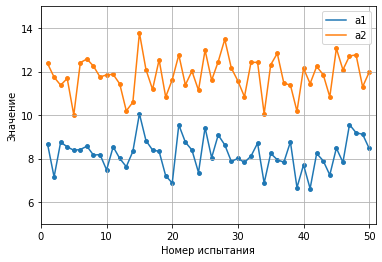

In [331]:
draw_borders(left, right)

## Интервалы для среднего и стандартного отклонения нормальной совокупности

In [345]:
norm_rv = sps.norm(10, 2)
sample = norm_rv.rvs(20)
mean = sample.mean()

ps = [0.8, 0.9, 0.95, 0.98, 0.99, 0.995, 0.998, 0.999]
pss = list(map(lambda x: (1+x)/2, ps))
left, right = [], []
for p in pss:
    fp = sps.norm(0,1).ppf(p)
    left.append(mean - fp*(2/np.sqrt(20)))
    right.append(mean + fp*(2/np.sqrt(20)))
    
df = pd.DataFrame(index=ps)
df['left'] = left
df['right'] = right
print('Интервалы для a:')
df

Интервалы для a:


,left,right
0.800,9.207188,10.353442
0.900,9.044714,10.515916
0.950,8.903793,10.656838
0.980,8.739941,10.820689
0.990,8.628369,10.932261
0.995,8.524971,11.035659
0.998,8.398321,11.162309
0.999,8.308747,11.251883


In [346]:
left, right = [], []
std = statistics.stdev(sample)
for p in ps:
    tp = sps.t(df=9).ppf(p)
    chi2_rv = sps.chi2(df=19)
    t1 = chi2_rv.ppf((1+p)/2)
    t2 = chi2_rv.ppf((1-p)/2)
    left.append(std * np.sqrt((n-1) / t1))
    right.append(std * np.sqrt((n-1) / t2))
df = pd.DataFrame(index=ps)
df['left'] = left
df['right'] = right
print('Интервалы для sigma:')
df

Интервалы для sigma:


,left,right
0.800,1.534087,2.344138
0.900,1.457357,2.515573
0.950,1.395982,2.681076
0.980,1.330036,2.896164
0.990,1.288158,3.058503
0.995,1.251357,3.221910
0.998,1.208720,3.441060
0.999,1.180079,3.610096


In [360]:
norm_rv = sps.norm(10, 2)
sample = norm_rv.rvs(size=20)
stud_rv = sps.t(df=19)
chi2_rv = sps.chi2(df=19)
Pd = 0.95
print(stud_rv.ppf(Pd))
print(chi2_rv.ppf(1-Pd))
print('Верхняя граница для a: ', np.round(sample.mean() + stud_rv.ppf(Pd) * statistics.stdev(sample) / np.sqrt(20), 2))
print('Верхняя граница для a: ', np.round(statistics.stdev(sample) * np.sqrt((n-1) / chi2_rv.ppf(1-Pd)), 2))

1.729132811521367
10.117013063859051
Верхняя граница для a:  10.51
Верхняя граница для a:  2.66


## Задача

n=20, Pд=0.99, a=300

In [334]:
N = 10000
a = 300
n = 20
uni_rv = sps.uniform(loc=a)
sample = uni_rv.rvs(n)
sample

array([300.32496491, 300.19847531, 300.30359646, 300.67709399,
       300.49409569, 300.7097796 , 300.86978723, 300.60031206,
       300.0216832 , 300.94560427, 300.66887303, 300.27331278,
       300.18194157, 300.65504807, 300.37831797, 300.42966052,
       300.90653586, 300.10007229, 300.77189133, 300.37733731])

In [335]:
Pd = 0.99
mean = sample.mean()
chi2_rv = sps.chi2(df=2*n)
t1, t2 = chi2_rv.ppf((1-Pd)/2), chi2_rv.ppf((1+Pd)/2)
print(t1, t2)
a1, a2 = 2*n*mean / t2, 2*n*mean / t1
print('Доверительный интервал для a ({:.2f}, {:.2f})'.format(a1, a2))

m1, m2 = N*(1 - np.exp(-50/a2)), N*(1 - np.exp(-50/a1))
print('Доверительный интервал для M ({:.2f}, {:.2f})'.format(m1, m2))

20.706535316970086 66.76596183280391
Доверительный интервал для a (180.03, 580.48)
Доверительный интервал для M (825.30, 2425.02)
